# Exploratory data analysis on Imbruvica data

For each prescriber and drug, the dataset includes the total number of prescriptions that were dispensed (including original prescriptions and any refills), total 30-day standardized fill counts, total day’s supply for these prescriptions, and the total drug cost. To protect the privacy of Medicare beneficiaries, any aggregated records which are derived from 10 or fewer claims are excluded from the Part D Prescriber PUF.


bene_count_ge65 – The total number of unique Medicare Part D beneficiaries age 65 and older with at least one claim for the drug. A blank indicates the value is suppressed. See bene_count_ge65_suppress_flag regarding suppression of data.


**bene_count_ge65_suppress_flag** – A flag indicating the reason the bene_count_ge65 variable is suppressed.

    “*” = Primary suppressed due to bene_count_ge65 between 1 and 10.
    “#” = Counter suppressed because the “less than 65 year old” group (not explicitly displayed)
    contains a beneficiary count between 1 and 10, which can be mathematically determined from bene_count_ge65 and bene_count.
    
total_claim_count_ge65 – The number of Medicare Part D claims for beneficiaries age 65 and older. This includes original prescriptions and refills. A blank indicates the value is suppressed. See ge65_suppress_flag regarding suppression of data.

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
imbruvica = pd.read_csv('data/partd_imbruvica_2016.txt', delimiter='\t')
cols = pd.read_csv('data/CMS_PartD_Prescriber_NPI_Drug_CY2016_100.txt', delimiter='\t').columns
imbruvica.columns = cols
imbruvica.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
0,1003051871,POPALZAI,MUHAMMAD,CARTERVILLE,IL,Hematology-Oncology,S,IMBRUVICA,IBRUTINIB,NaN,...,15.0,450,126933.23,NaN,*,15.0,NaN,15.0,450.0,126933.23
1,1003058454,DEAFENBAUGH,LUANN,WARSAW,IN,Nurse Practitioner,S,IMBRUVICA,IBRUTINIB,NaN,...,15.0,450,110868.32,NaN,*,NaN,*,NaN,NaN,NaN
2,1003067455,FENG,YAN,CLEVELAND,OH,Hematology-Oncology,S,IMBRUVICA,IBRUTINIB,NaN,...,23.0,690,231135.61,NaN,*,19.0,NaN,23.0,690.0,231135.61
3,1003131640,CHINTAPATLA,RANGASWAMY,KENNEWICK,WA,Hematology-Oncology,S,IMBRUVICA,IBRUTINIB,NaN,...,25.0,720,244390.09,NaN,*,25.0,NaN,25.0,720.0,244390.09
4,1003804287,VILLAR,MARY JO,HIALEAH,FL,Hematology-Oncology,S,IMBRUVICA,IBRUTINIB,NaN,...,11.0,330,148331.63,NaN,*,11.0,NaN,11.0,330.0,148331.63


In [5]:
imbruvica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3314 entries, 0 to 3313
Data columns (total 21 columns):
npi                              3314 non-null int64
nppes_provider_last_org_name     3314 non-null object
nppes_provider_first_name        3314 non-null object
nppes_provider_city              3314 non-null object
nppes_provider_state             3314 non-null object
specialty_description            3314 non-null object
description_flag                 3314 non-null object
drug_name                        3314 non-null object
generic_name                     3314 non-null object
bene_count                       103 non-null float64
total_claim_count                3314 non-null int64
total_30_day_fill_count          3314 non-null float64
total_day_supply                 3314 non-null int64
total_drug_cost                  3314 non-null float64
bene_count_ge65                  85 non-null float64
bene_count_ge65_suppress_flag    3229 non-null object
total_claim_count_ge65         

In [6]:
imbruvica.describe()

,npi,bene_count,total_claim_count,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
count,3.314000e+03,103.000000,3314.000000,3314.000000,3314.000000,3.314000e+03,85.000000,2780.000000,2780.000000,2780.000000,2.780000e+03
mean,1.499210e+09,15.368932,25.081171,25.242456,753.882921,2.425873e+05,6.905882,23.263669,23.410036,699.373381,2.246615e+05
std,2.878224e+08,6.103664,19.408155,19.599784,586.550452,1.859042e+05,7.389864,17.157859,17.270114,516.571301,1.656550e+05
min,1.003052e+09,11.000000,11.000000,11.000000,147.000000,1.774713e+04,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.245415e+09,11.000000,13.000000,13.000000,390.000000,1.300060e+05,0.000000,13.000000,13.000000,390.000000,1.239504e+05
50%,1.497855e+09,13.000000,19.000000,19.000000,570.000000,1.889570e+05,11.000000,18.000000,18.000000,540.000000,1.770564e+05
75%,1.740622e+09,17.000000,29.000000,30.000000,883.750000,2.870963e+05,12.000000,28.000000,28.000000,840.000000,2.718749e+05
max,1.992999e+09,51.000000,283.000000,303.000000,9086.000000,2.139523e+06,31.000000,236.000000,236.000000,7074.000000,2.091627e+06


In [88]:
npi = pd.read_csv('data/PartD_Prescriber_PUF_NPI_16_100.txt', delimiter='\t')

imbruvica = pd.read_csv('data/imbruvica_prescrib_npi_summary.csv', delimiter='\t')
duplicate_cols = ['npi.1', 
                  'nppes_provider_last_org_name.1', 
                  'nppes_provider_first_name.1', 
                  'nppes_provider_city.1', 
                  'nppes_provider_state.1', 
                  'specialty_description.1', 
                  'description_flag.1', 
                  'total_claim_count.1',
                  'total_30_day_fill_count.1',
                  'total_drug_cost.1', 
                  'total_day_supply.1', 
                  'bene_count.1', 
                  'ge65_suppress_flag.1', 
                  'total_claim_count_ge65.1', 
                  'total_30_day_fill_count_ge65.1', 
                  'total_drug_cost_ge65.1', 
                  'total_day_supply_ge65.1', 
                  'bene_count_ge65_suppress_flag.1', 
                  'bene_count_ge65.1']
imbruvica.drop(duplicate_cols, axis=1, inplace=True)
imbruvica.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
0,1033101068,MARQUES BIBILONI,JOSE,SANTURCE,PR,Hematology-Oncology,S,IMBRUVICA,IBRUTINIB,NaN,...,38.0,0.0,NaN,0.0,NaN,0.0,0.0,82.0,0.0,2.3657
1,1114922432,OYOLA,RAUL,MARIETTA,GA,Hematology-Oncology,S,IMBRUVICA,IBRUTINIB,NaN,...,89.0,196.0,38.0,NaN,NaN,0.0,NaN,215.0,37.0,1.9098
2,1073841938,BRAY,LISA,MILWAUKEE,WI,Nurse Practitioner,S,IMBRUVICA,IBRUTINIB,NaN,...,57.0,NaN,NaN,NaN,NaN,0.0,NaN,134.0,21.0,2.0907
3,1194784207,WEINSHEL,ERIC,EDINA,MN,Medical Oncology,S,IMBRUVICA,IBRUTINIB,NaN,...,67.0,NaN,NaN,NaN,0.0,NaN,NaN,168.0,12.0,1.9519
4,1134116262,TAI,MUHAMMAD,REXFORD,NY,Medical Oncology,S,IMBRUVICA,IBRUTINIB,NaN,...,80.0,206.0,NaN,NaN,NaN,0.0,NaN,172.0,60.0,1.9718


In [8]:
imbruvica.shape

(3315, 86)

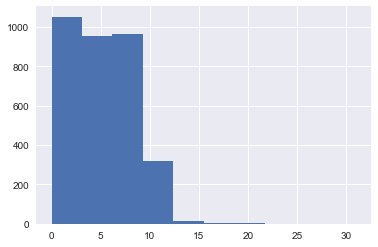

In [147]:
imbruvica['bene_count_ge65'].hist()

In [89]:
# Data cleaning script

specialties_other = ['Pharmacist', 'Certified Clinical Nurse Specialist', 'Cardiovascular Disease (Cardiology)', 'Emergency Medicine', 'Neurology', 'Psychiatry', 'Student in an Organized Health Care Education/Training Program', 'General Surgery', 'Dermatology', 'Radiation Oncology', 'Gynecological Oncology', 'Pediatric Medicine']
imbruvica.loc[:,'specialty_description'][imbruvica['specialty_description'].isin(specialties_other)] = 'Other'

# Make null bene_count, bene_count_ge65, total_claim_count_ge65, total_30_day_fill_count_ge65, brand_claim_count, other_claim_count, mapd_claim_count, pdp_claim_count, lis_claim_count, nonlis_claim_count, beneficiary_age_less_65_count, beneficiary_age_65_74_count, beneficiary_age_75_84_count, beneficiary_age_greater_84_count, beneficiary_female_count, beneficiary_male_count, beneficiary_race_white_count, beneficiary_race_black_count, beneficiary_race_asian_pi_count, beneficiary_race_hispanic_count, beneficiary_race_nat_ind_count, beneficiary_race_other_count, beneficiary_nondual_count, beneficiary_dual_count, beneficiary_average_risk_score with a random number between 1 and 10
cols_fillna = ['bene_count', 'bene_count_ge65', 'total_claim_count_ge65', 'total_30_day_fill_count_ge65', 'brand_claim_count', 'generic_claim_count', 'other_claim_count', 'mapd_claim_count', 'pdp_claim_count', 'lis_claim_count', 'nonlis_claim_count', 'beneficiary_age_less_65_count', 'beneficiary_age_65_74_count', 'beneficiary_age_75_84_count', 'beneficiary_age_greater_84_count', 'beneficiary_female_count', 'beneficiary_male_count', 'beneficiary_race_white_count', 'beneficiary_race_black_count', 'beneficiary_race_asian_pi_count', 'beneficiary_race_hispanic_count', 'beneficiary_race_nat_ind_count', 'beneficiary_race_other_count', 'beneficiary_nondual_count', 'beneficiary_dual_count', 'beneficiary_average_risk_score']
for col in cols_fillna:
    mask = imbruvica[col].isnull()
    imbruvica[col][mask] = imbruvica[col][mask].apply(lambda v: np.random.choice(range(1,11)))

# Fill null values with average for total_drug_cost_ge65, total_day_supply_ge65, brand_drug_cost, other_drug_cost, mapd_drug_cost, pdp_drug_cost, lis_drug_cost, nonlis_drug_cost, average_age_of_beneficiaries, beneficiary_age_less_65_count
cols_fillna = ['total_drug_cost_ge65', 'total_day_supply_ge65', 'brand_drug_cost', 'generic_drug_cost', 'other_drug_cost', 'mapd_drug_cost', 'pdp_drug_cost', 'lis_drug_cost', 'nonlis_drug_cost', 'average_age_of_beneficiaries']
for col in cols_fillna:
    imbruvica[col].fillna(imbruvica[col].mean(), inplace=True)

# Collapse variables in nppes_credentials
mds = ['M.D.', 'M.D', 'M. D.', 'MD.',  'M.D.,', 'M.D.,']
mds_plus = ['MD, PHD', 'M.D., PH.D.', 'M.D., PHD', 'MD PHD', 'MD, FACP', 'M.D., PH.D', 'M.D., M.S(MOL BIO)', 'MD, PHD.', 'M.D., F.A.C.P.', 'M.D., PH. D.', 'M.D., M.P.H.', 'M.D./PH.D', 'M.D. F.A.C.P', 'M.D., M.P.H', 'M.D., M.S.,', 'M.D., M.S.', 'MD, MPH', 'M.D. PHD', 'M.D./PH.D.', 'M.D. PHD', 'MD, MPH, FACP', 'M.D. PHD', 'MD FACP', 'M.D, PHD', 'MD,MPH', 'PHD,MD,FACP', 'MD, MBA', 'MD, CM', 'M.D, MRCP', 'MD,FACP', 'MD  FACP', 'MD PC', 'M.D.,M.B.A.', 'MD DPHIL', 'MD,PHD', 'M.D,', 'M.D.,PH.D', 'M.D., FACP', 'M.D.,PH.D.']
nps = ['CRNP', 'N.P.', 'ARNP', 'FNP', 'CNP', 'NP-C', 'NURSE PRACTITIONER', 'ANP', 'FNP-BC', 'ACNP-BC', 'ACNP', 'AOCNP, ACNP/FNP-BC', 'RN, AOCNS, NP', 'NP, MS', 'RN,BSN,OCN,NP', 'C.R.N.P.', 'RN MN ANP AOCN', 'F.N.P.', 'APNP', 'APRN BC', 'ANP, FNP', 'ACNP RN', 'RN, MS, NP', 'RN MSN ACNP-BC', 'MSN, RN, NP-C', 'RN, NP', 'APNP','ANP, GNP-BC', 'RN, ANP', 'MSN, NP', 'FNP-C', 'M.S.N., O.N.P.', 'ANP-B C', 'MSN, ACNP-BC', 'FNP-BC, AOCNP', 'RN, MSN, FNP', 'RN  MS  FNP', 'R.N., N.P.', 'RN, AGACNP', 'MSN, RN, ANP-BC', 'MS, APRN, BC, AOCN', 'RN, MS, ANP-BC, ADCN', 'MSN, CRNP, OCN', 'AGNP', 'NP, RN, OCN' \
      'MSN, ARNP', 'APRN MSN', 'ANP-BC, GNP-BC', 'MSN, ARNP', 'NP, RN, OCN', 'ANPC', 'AANPCP', 'CFNP', 'MSN, CRNP', 'ANP-BC', 'APRN-BC', 'APN']
rns = ['R.N.', 'RN, ACNP-BC', 'RN, APN-C', 'APRN', 'RN, ARNP', 'BSN', 'APRN,BC', 'RN, BSN, MSN']
dos = ['D.O., M.S.', 'D. O.', 'D.O.,M.S.', 'PH.D., D.O.', 'D.O', 'D.O.']
pas = ['PA-C', 'P.A.', 'PAC', 'P.A.-C', 'PA C', 'M.S., P.A.-C', 'RPAC', 'RPA-C', 'PAC']
other_creds = ['MB CHB, FCP ( SA )', 'MB, BCH', 'MBBS', 'MBBS, MRCP', 'PHARM.D', 'PHARMD', 'PHARM.D.']
imbruvica.loc[:,'nppes_credentials'][imbruvica['nppes_credentials'].isin(mds)] = 'MD'
imbruvica.loc[:,'nppes_credentials'][imbruvica['nppes_credentials'].isin(mds_plus)] = 'MD plus'
imbruvica.loc[:,'nppes_credentials'][imbruvica['nppes_credentials'].isin(nps)] = 'NP'
imbruvica.loc[:,'nppes_credentials'][imbruvica['nppes_credentials'].isin(rns)] = 'RN'
imbruvica.loc[:,'nppes_credentials'][imbruvica['nppes_credentials'].isin(pas)] = 'PAC'
imbruvica.loc[:,'nppes_credentials'][imbruvica['nppes_credentials'].isin(dos)] = 'DO'
imbruvica.loc[:,'nppes_credentials'][imbruvica['nppes_credentials'].isin(other_creds)] = 'Other'

/Users/mattheweng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/mattheweng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/mattheweng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mattheweng/anac

### Data engineering

Prioritize features to work on cleaning and engineering

Cleaned already:
nppes_provider_city
nppes_provider_state
specialty_description
bene_count
total_claim_count
total_30_day_fill_count
total_day_supply
bene_count_ge65 - num null doesn't match up to num suppressed
total_claim_count_ge65
total_30_day_fill_count_ge65
total_day_supply_ge65
total_drug_cost_ge65
brand_claim_count
brand_drug_cost
nppes_credentials
nppes_provider_gender
generic_claim_count
generic_suppress_flag - matches number of null in generic_claim_count, generic_drug_cost
other_claim_count
other_drug_cost
mapd_claim_count
mapd_drug_cost
pdp_claim_count
pdp_drug_cost
lis_claim_count
lis_drug_cost
nonlis_claim_count
nonlis_drug_cost
average_age_of_beneficiaries
beneficiary_age_less_65_count
beneficiary_age_65_74_count
beneficiary_age_75_84_count
beneficiary_age_greater_84_count
beneficiary_female_count
beneficiary_male_count
beneficiary_race_white_count
beneficiary_race_black_count
beneficiary_race_asian_pi_count
beneficiary_race_hispanic_count
beneficiary_race_nat_ind_count
beneficiary_race_other_count
beneficiary_nondual_count
beneficiary_dual_count
beneficiary_average_risk_score

High
nppes_provider_zip5
nppes_provider_zip4
Could find statistics/demographics about zipcodes
Could look at prior prescribing history for each doctor for previous oncology drugs and determine 

Med
total_drug_cost - could be feature engineered to look at total drugs sold for each doctor?
bene_count_ge65_suppress_flag - change to true/false?
ge65_suppress_flag - change to true/false?
medicare_prvdr_enroll_status

Low
opioid_claim_count
opioid_drug_cost
opioid_day_supply
opioid_bene_count
opioid_prescriber_rate
er_opioid_claim_count
er_opioid_drug_cost
er_opioid_day_supply
er_opioid_bene_count
er_opioid_prescriber_rate
antibiotic_claim_count
antibiotic_drug_cost
antibiotic_bene_count
antipsych_ge65_suppress_flag
antipsych_claim_count_ge65
antipsych_drug_cost_ge65
antipsych_bene_ge65_suppress_flg
antipsych_bene_count_ge65

### Visualize variables that make be important for predicting prescribing behavior

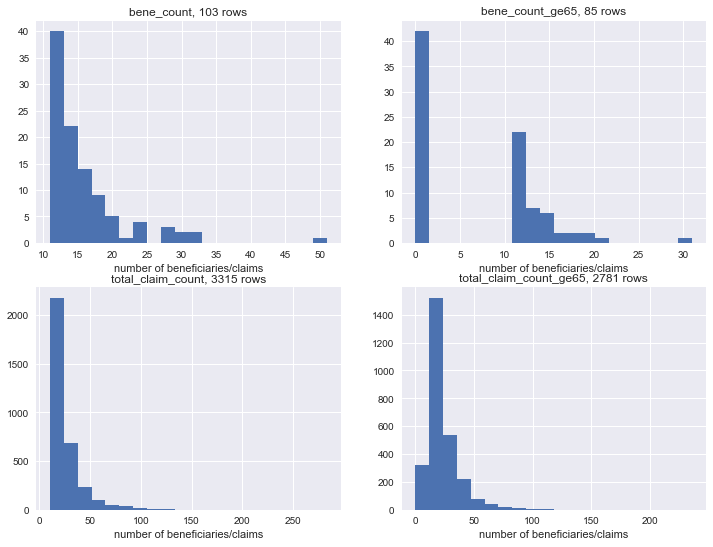

In [57]:
graphs = ['bene_count', 'bene_count_ge65', 'total_claim_count', 'total_claim_count_ge65']

fig = plt.figure(figsize=(12,9))

for i, graph in enumerate(graphs, 1):
    ax = fig.add_subplot(2,2,i)
    ax.hist(imbruvica[graph].dropna(), bins=20)
    count = imbruvica[graph].dropna().count()
    title = '{}, {} rows'.format(graph, count)
    ax.set_title(title)
    ax.set_xlabel('number of beneficiaries/claims')

plt.tight_layout;

In [77]:
imbruvica[['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name']]

,npi,nppes_provider_last_org_name,nppes_provider_first_name
0,1033101068,MARQUES BIBILONI,JOSE
1,1114922432,OYOLA,RAUL
2,1073841938,BRAY,LISA
3,1194784207,WEINSHEL,ERIC
4,1134116262,TAI,MUHAMMAD
5,1184628059,GINSBERG,ARI
6,1619926375,MALIK,BILAL
7,1467559856,LEVY,ROBERT
8,1497861025,KRESSEL,BRUCE
9,1558353987,CAMERON,DANIEL


In [96]:
#Take columns that do not have false salues to make simple, initial model
# need to make dummies for description_flag
imbruvica_simp_cols = imbruvica.columns[imbruvica.isnull().any() != True]
imbruvica_simp = imbruvica[imbruvica_simp_cols]
drop_cols = ['nppes_provider_last_org_name', 'nppes_provider_first_name', 'nppes_provider_city', 'nppes_provider_state', 'specialty_description', 'drug_name', 'generic_name', 'description_flag']
imbruvica_simp.set_index('npi', inplace=True)
imbruvica_simp.drop(drop_cols, axis=1, inplace=True)

/Users/mattheweng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [97]:
imbruvica_simp.head()

,bene_count,total_claim_count,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,...,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_asian_pi_count,beneficiary_race_hispanic_count,beneficiary_race_nat_ind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_average_risk_score
npi,,,,,,,,,,,,,,,,,,,,,
1033101068,1.0,12,12.0,360,123357.78,6.0,12.0,12.0,360.000000,123357.780000,...,38.0,0.0,2.0,0.0,10.0,0.0,0.0,82.0,0.0,2.3657
1114922432,9.0,11,11.0,330,114210.49,5.0,6.0,9.0,699.380798,224679.559612,...,89.0,196.0,38.0,3.0,3.0,0.0,6.0,215.0,37.0,1.9098
1073841938,1.0,26,26.0,780,266111.25,3.0,2.0,4.0,699.380798,224679.559612,...,57.0,4.0,3.0,6.0,1.0,0.0,3.0,134.0,21.0,2.0907
1194784207,5.0,11,11.0,330,117261.04,8.0,11.0,11.0,330.000000,117261.040000,...,67.0,5.0,6.0,9.0,0.0,6.0,6.0,168.0,12.0,1.9519
1134116262,2.0,27,27.0,810,275823.78,5.0,27.0,27.0,810.000000,275823.780000,...,80.0,206.0,2.0,3.0,7.0,0.0,3.0,172.0,60.0,1.9718


In [114]:
bottom25.count()

bene_count                          901
total_claim_count                   901
total_30_day_fill_count             901
total_day_supply                    901
total_drug_cost                     901
bene_count_ge65                     901
total_claim_count_ge65              901
total_30_day_fill_count_ge65        901
total_day_supply_ge65               901
total_drug_cost_ge65                901
nppes_provider_gender               901
nppes_entity_code                   901
nppes_provider_street1              901
nppes_provider_zip5                 901
nppes_provider_country              901
medicare_prvdr_enroll_status        901
brand_claim_count                   901
brand_drug_cost                     901
generic_claim_count                 901
generic_drug_cost                   901
other_claim_count                   901
other_drug_cost                     901
mapd_claim_count                    901
mapd_drug_cost                      901
pdp_claim_count                     901


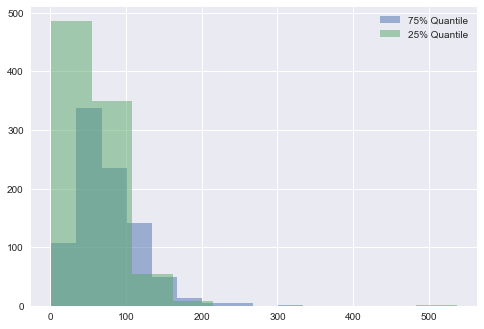

In [112]:
top25 = imbruvica_simp[imbruvica_simp['total_claim_count'] >= imbruvica_simp['total_claim_count'].quantile(0.75)]
bottom25 = imbruvica_simp[imbruvica_simp['total_claim_count'] <= imbruvica_simp['total_claim_count'].quantile(0.25)]

top25['beneficiary_male_count'].hist(alpha=0.5, label='75% Quantile')
bottom25['beneficiary_male_count'].hist(alpha=0.5, label='25% Quantile')
plt.legend();

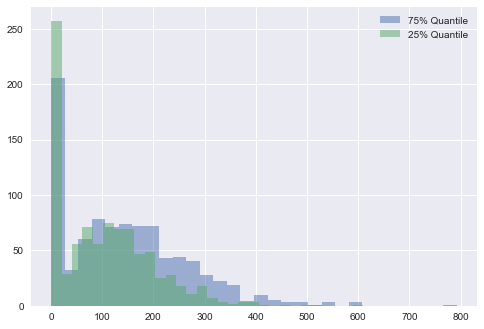

In [129]:
top25['beneficiary_race_white_count'].hist(alpha=0.5, label='75% Quantile', bins=30)
bottom25['beneficiary_race_white_count'].hist(alpha=0.5, label='25% Quantile', bins=30)
plt.legend();

In [ ]:
# Possible to determine the probability of being given a drug earlier rather than later?
# Do these trends decrease over time?

In [81]:
imbruvica_simp.columns

Index(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_city', 'nppes_provider_state', 'specialty_description',
       'description_flag', 'drug_name', 'generic_name', 'bene_count',
       'total_claim_count', 'total_30_day_fill_count', 'total_day_supply',
       'total_drug_cost', 'bene_count_ge65', 'total_claim_count_ge65',
       'total_30_day_fill_count_ge65', 'total_day_supply_ge65',
       'total_drug_cost_ge65', 'nppes_provider_gender', 'nppes_entity_code',
       'nppes_provider_street1', 'nppes_provider_zip5',
       'nppes_provider_country', 'medicare_prvdr_enroll_status',
       'brand_claim_count', 'brand_drug_cost', 'generic_claim_count',
       'generic_drug_cost', 'other_claim_count', 'other_drug_cost',
       'mapd_claim_count', 'mapd_drug_cost', 'pdp_claim_count',
       'pdp_drug_cost', 'lis_claim_count', 'lis_drug_cost',
       'nonlis_claim_count', 'nonlis_drug_cost',
       'average_age_of_beneficiaries', 'beneficiary_age_l